<a href="https://colab.research.google.com/github/Amitgm/ML-Projects-Emotion-Speech-Classification/blob/main/Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://proceedings.scipy.org/articles/Majora-7b98e3ed-003).


### **Kaggle Competition**

[Kaggle Competition Document](https://drive.google.com/file/d/17ZnNcJtGfzHKNaqXYN1eCo_5ap0kIAZs/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


In [21]:
!pip -qq install librosa soundfile
!pip -qq install wavio

In [22]:
!kaggle datasets download -d amitgm1994/ravdees-dataset
!kaggle datasets download -d amitgm1994/Tess-dataset

Dataset URL: https://www.kaggle.com/datasets/amitgm1994/ravdees-dataset
License(s): CC0-1.0
ravdees-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/amitgm1994/Tess-dataset
License(s): CC0-1.0
Tess-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip ravdees-dataset.zip

Archive:  ravdees-dataset.zip
replace ravdess/Actor_01/03-01-01-01-01-01-01_neutral.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
!unzip Tess-dataset.zip

Archive:  Tess-dataset.zip
replace Tess/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Neccesary Packages

In [25]:
!pip install scikit-learn==1.4.0

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# !unzip /content/Tess.zip

In [28]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### No. of files under the 'Tess' and 'ravdess' folder

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [29]:
# YOUR CODE HERE
# ** subderectories and & * Matches the contents of the directories found by **. Specifically, it matches files and subdirectories one level deeper within each of the matched directories.
Tess_files = glob.glob("Tess/**/*/*", recursive=True)

# Print the list of files
print("Files found:", Tess_files[1:4])

Files found: ['Tess/OAF_surprised/OAF_voice_surprised.wav', 'Tess/OAF_surprised/OAF_puff_surprised.wav', 'Tess/OAF_surprised/OAF_hit_surprised.wav']


In [30]:
ravdess_files = glob.glob("ravdess/**/*/*", recursive=True)

print("Files found:", ravdess_files)

Files found: ['ravdess/Actor_03/03-01-04-01-02-02-03_sad.wav', 'ravdess/Actor_03/03-01-08-02-02-01-03_surprised.wav', 'ravdess/Actor_03/03-01-06-02-02-01-03_fear.wav', 'ravdess/Actor_03/03-01-01-01-02-01-03_neutral.wav', 'ravdess/Actor_03/03-01-08-01-01-02-03_surprised.wav', 'ravdess/Actor_03/03-01-04-02-01-02-03_sad.wav', 'ravdess/Actor_03/03-01-08-02-01-02-03_surprised.wav', 'ravdess/Actor_03/03-01-08-02-01-01-03_surprised.wav', 'ravdess/Actor_03/03-01-07-02-01-02-03_disgust.wav', 'ravdess/Actor_03/03-01-05-02-02-01-03_angry.wav', 'ravdess/Actor_03/03-01-06-02-02-02-03_fear.wav', 'ravdess/Actor_03/03-01-06-01-02-01-03_fear.wav', 'ravdess/Actor_03/03-01-03-02-02-02-03_happy.wav', 'ravdess/Actor_03/03-01-04-02-02-02-03_sad.wav', 'ravdess/Actor_03/03-01-07-02-02-01-03_disgust.wav', 'ravdess/Actor_03/03-01-04-01-01-02-03_sad.wav', 'ravdess/Actor_03/03-01-05-01-02-01-03_angry.wav', 'ravdess/Actor_03/03-01-05-02-02-02-03_angry.wav', 'ravdess/Actor_03/03-01-05-01-01-01-03_angry.wav', 'ravde

In [31]:
input_audio_files = Tess_files + ravdess_files

In [32]:
labels = []
paths = []
for file in input_audio_files:

  label = file.split("_")[-1].split(".")[0]

  labels.append(label.lower())

print("the dataset is loaded")

print("Length of labels",len(labels))

paths = input_audio_files

dataframe = pd.DataFrame()

dataframe["paths"] = paths
dataframe["labels"] = labels

the dataset is loaded
Length of labels 2500


In [33]:
dataframe.head(2)

,paths,labels
0,Tess/OAF_surprised/OAF_hurl_surprised.wav,surprised
1,Tess/OAF_surprised/OAF_voice_surprised.wav,surprised


#### Play the sample audio

In [34]:
import random
import time

num_samples_to_play = 2
# Play the audio file
# Audio("Tess/YAF_disgust/YAF_door_disgust.wav")

# get random samples
def get_random_sample(input_audio_files: list, count:int) -> list:

    random_sample_files = random.sample(input_audio_files,count)

    return random_sample_files

random_clips = get_random_sample(paths,3)
# play sample clips
for r in random_clips:

    print('playing audio clip =',r)

    display(ipd.Audio(r,autoplay=True))

    time.sleep(4)

playing audio clip = Tess/OAF_happy/OAF_jail_happy.wav


playing audio clip = Tess/OAF_surprised/OAF_half_surprised.wav


playing audio clip = Tess/OAF_surprised/OAF_sheep_surprised.wav


In [35]:
value_counts = dataframe["labels"].value_counts()
value_counts

,count
labels,
surprised,376
disgust,374
fear,372
angry,371
sad,370
happy,359
neutral,278


### Data Exploration and Visualization (1 points)

#### Visualize the distribution of all the labels both Tess and Ravdees files

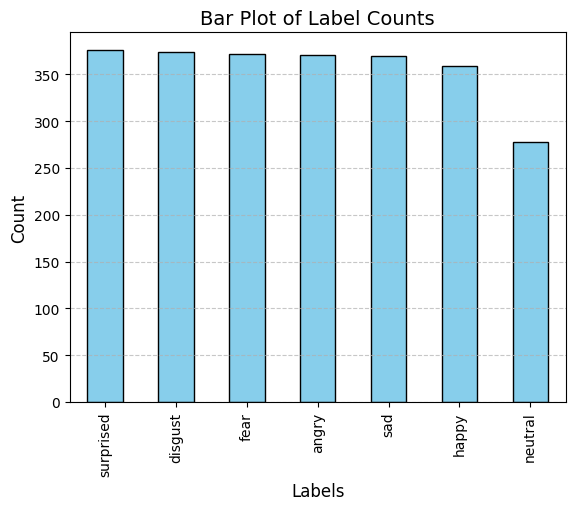

In [36]:
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Bar Plot of Label Counts', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show grid and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Visualize the distribution of all the labels of Tess Files

In [37]:
emotions_ = []
for file in Tess_files:
    emotions_.append(file.split("_")[-1][:-4])
set(emotions_)

{'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'}

<BarContainer object of 7 artists>

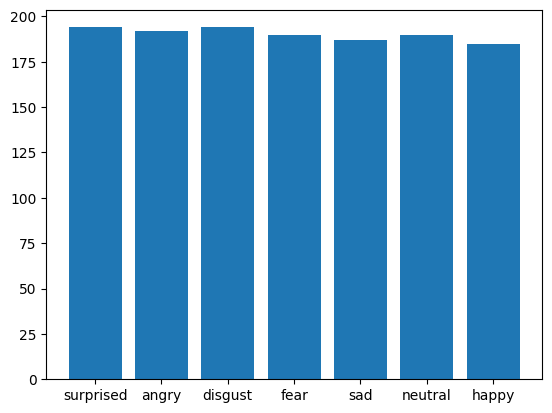

In [38]:
from collections import Counter
freq_emotions = Counter(emotions_)
plt.bar(freq_emotions.keys(),freq_emotions.values())

#### Visualize sample audio signal using librosa

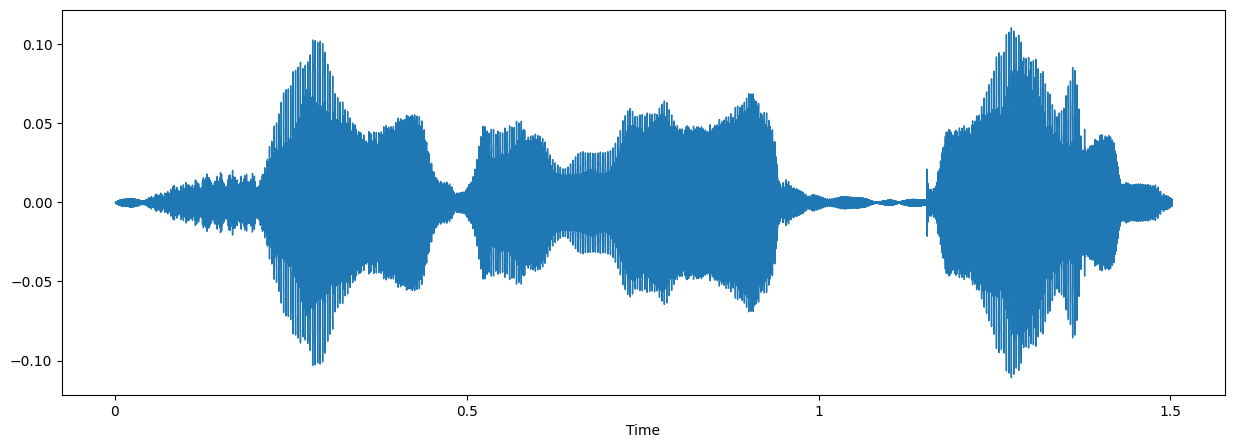

In [45]:
sample_audio_path = '/content/Tess/OAF_Fear/OAF_dead_fear.wav'

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [46]:
# YOUR CODE HERE

audio_path = "/content/Tess/OAF_Fear/OAF_dead_fear.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None keeps the original sampling rate

# Print details of the audio signal
print(f"Audio Time Series Shape: {y.shape}")
print(f"Sampling Rate: {sr} Hz")
print(f"Duration of Audio: {len(y) / sr:.2f} seconds")

# Check if the audio is mono or stereo
if y.ndim == 1:
    print("The audio is mono (single channel).")
else:
    print("The audio is stereo (two channels).")

Audio Time Series Shape: (36673,)
Sampling Rate: 24414 Hz
Duration of Audio: 1.50 seconds
The audio is mono (single channel).


#### Create a dictionary to encode the emotions

In [41]:
# YOUR CODE HERE
Emotion = {1 : "neutral", 2 : "calm", 3 :"happy", 4 : "sad", 5 : "angry", 6 : "fearful", 7 : "disgust", 8 : "surprised"}

#### Extracting features from the file path

In [47]:
X, sample_rate = librosa.load("/content/Tess/OAF_Fear/OAF_dead_fear.wav")

In [48]:
def extract_feature(file_name):
    """Function Extracts Features from WAV file"""
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [49]:
dataframe["paths"]

,paths
0,Tess/OAF_surprised/OAF_hurl_surprised.wav
1,Tess/OAF_surprised/OAF_voice_surprised.wav
2,Tess/OAF_surprised/OAF_puff_surprised.wav
3,Tess/OAF_surprised/OAF_hit_surprised.wav
4,Tess/OAF_surprised/OAF_sub_surprised.wav
...,...
2495,ravdess/Actor_11/03-01-08-01-01-02-11_surprise...
2496,ravdess/Actor_11/03-01-06-01-02-02-11_fear.wav
2497,ravdess/Actor_11/03-01-03-02-01-02-11_happy.wav
2498,ravdess/Actor_11/03-01-01-01-01-02-11_neutral.wav


In [50]:
features = dataframe["paths"].apply(lambda x: extract_feature(x))

In [51]:
dataframe["features"] = features

In [52]:
dataframe["features"].head(2)

,features
0,"[-470.13720703125, 117.62013244628906, 1.52436..."
1,"[-420.373046875, 65.31548309326172, 10.5488548..."


In [53]:
feature_values = pd.DataFrame(dataframe["features"].to_list())

# Combine the new columns with the original DataFrame
df_expanded = pd.concat([dataframe.drop(columns=["features"]), feature_values], axis=1)

# Optionally, rename the feature columns
df_expanded.columns = list(dataframe.columns[:-1]) + [f"feature_{i}" for i in range(feature_values.shape[1])]


In [54]:
df_expanded.head(3)

,paths,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,Tess/OAF_surprised/OAF_hurl_surprised.wav,surprised,-470.137207,117.620132,1.524361,-26.942493,-12.165500,12.642540,-24.668264,-4.311681,...,0.000143,0.000124,0.000203,0.000140,0.000116,0.000075,0.000037,0.000023,0.000013,9.550801e-07
1,Tess/OAF_surprised/OAF_voice_surprised.wav,surprised,-420.373047,65.315483,10.548855,-5.953710,-0.046973,-4.145175,-13.457773,-1.879925,...,0.000675,0.000803,0.000728,0.000692,0.000516,0.000453,0.000395,0.000293,0.000123,1.282403e-05
2,Tess/OAF_surprised/OAF_puff_surprised.wav,surprised,-422.637756,73.840195,1.030174,-14.266774,-1.876124,1.954534,-8.861056,5.124105,...,0.000416,0.000778,0.001005,0.000721,0.000774,0.000568,0.000619,0.000406,0.000203,2.146861e-05


#### Create a dictionary or a function to encode the emotions

In [55]:
emotion = {'neutral' : 1, 'calm' : 2,'happy' : 3, 'sad' : 4, 'angry' : 5, 'fear': 6, 'disgust':7, 'surprised' : 8}

In [56]:
df_expanded["labels"].unique()

array(['surprised', 'angry', 'disgust', 'fear', 'sad', 'neutral', 'happy'],
      dtype=object)

In [57]:
df_expanded["labels"] = df_expanded["labels"].map(emotion)

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [58]:
# YOUR CODE HERE
df_expanded.to_csv("features_dataset.csv")

In [59]:
df_expanded = pd.read_csv("features_dataset.csv")

In [60]:
# df_expanded.drop(["paths"],axis=1,inplace=True)
df_expanded.drop(["Unnamed: 0"],axis=1,inplace=True)

In [61]:
df_expanded.head(2)

,paths,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,Tess/OAF_surprised/OAF_hurl_surprised.wav,8,-470.137207,117.620132,1.524361,-26.942493,-12.165500,12.642540,-24.668264,-4.311681,...,0.000143,0.000124,0.000203,0.000140,0.000116,0.000075,0.000037,0.000023,0.000013,9.550801e-07
1,Tess/OAF_surprised/OAF_voice_surprised.wav,8,-420.373047,65.315483,10.548855,-5.953710,-0.046973,-4.145175,-13.457773,-1.879925,...,0.000675,0.000803,0.000728,0.000692,0.000516,0.000453,0.000395,0.000293,0.000123,1.282403e-05


In [62]:
df_expanded.iloc[:,2:]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,-470.137207,117.620132,1.524361,-26.942493,-12.165500,12.642540,-24.668264,-4.311681,-15.089357,-2.306769,...,1.432712e-04,1.240962e-04,2.029189e-04,1.398785e-04,1.163614e-04,7.542020e-05,3.703567e-05,2.256072e-05,1.324460e-05,9.550801e-07
1,-420.373047,65.315483,10.548855,-5.953710,-0.046973,-4.145175,-13.457773,-1.879925,-15.245259,-2.074623,...,6.748639e-04,8.027117e-04,7.275129e-04,6.922017e-04,5.155698e-04,4.528635e-04,3.950727e-04,2.927098e-04,1.231340e-04,1.282403e-05
2,-422.637756,73.840195,1.030174,-14.266774,-1.876124,1.954534,-8.861056,5.124105,-13.475521,-5.528358,...,4.162910e-04,7.777594e-04,1.004850e-03,7.211940e-04,7.742827e-04,5.683161e-04,6.190560e-04,4.062916e-04,2.031065e-04,2.146861e-05
3,-382.305267,84.059715,-0.255876,-2.839347,6.584079,-13.047643,-20.030554,0.455209,-15.613698,-0.536938,...,2.429034e-03,2.227227e-03,1.984621e-03,1.311489e-03,9.950321e-04,9.477884e-04,7.725893e-04,3.916244e-04,1.880319e-04,1.136338e-05
4,-417.429626,66.790909,9.073213,-12.152995,-4.045520,1.040071,-16.182652,4.369727,-19.645870,-3.025490,...,9.018460e-04,8.317237e-04,1.131901e-03,1.048049e-03,9.048692e-04,7.447978e-04,7.163355e-04,4.650658e-04,1.773130e-04,1.536764e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-639.024963,56.242558,-3.178749,14.656986,-8.649986,10.064309,-8.323810,2.704706,-6.606270,-2.674153,...,1.032835e-12,9.147615e-13,8.314991e-13,7.716697e-13,7.266607e-13,6.927880e-13,6.678039e-13,6.501816e-13,6.375631e-13,6.298679e-13
2496,-617.119995,70.404991,-3.789646,24.148983,-6.608201,14.350000,-6.279007,0.861719,-7.546703,-1.049101,...,3.801792e-14,3.088193e-14,2.676218e-14,2.389076e-14,2.171217e-14,2.026788e-14,1.936053e-14,1.904103e-14,1.844248e-14,1.795740e-14
2497,-495.239563,58.233929,-11.249621,20.127403,-7.784638,8.116242,-6.612873,5.041245,-7.521903,-1.315730,...,1.321575e-13,1.002811e-13,8.245322e-14,6.660907e-14,5.593371e-14,4.893904e-14,4.732808e-14,4.407789e-14,4.184087e-14,3.896028e-14
2498,-706.744751,78.501472,6.224631,30.274443,-1.100254,16.254120,-0.809389,6.873510,-5.269948,2.249218,...,1.344491e-13,1.206036e-13,1.108236e-13,1.039121e-13,9.881270e-14,9.506213e-14,9.238932e-14,9.058115e-14,8.930408e-14,8.843901e-14


#### Scaling The Features

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
numerical_data = scaler.fit_transform(df_expanded.iloc[:,2:])

df_scaled = pd.DataFrame(numerical_data, columns=df_expanded.columns[2:])

In [64]:
df_expanded.head(2)

,paths,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,Tess/OAF_surprised/OAF_hurl_surprised.wav,8,-470.137207,117.620132,1.524361,-26.942493,-12.165500,12.642540,-24.668264,-4.311681,...,0.000143,0.000124,0.000203,0.000140,0.000116,0.000075,0.000037,0.000023,0.000013,9.550801e-07
1,Tess/OAF_surprised/OAF_voice_surprised.wav,8,-420.373047,65.315483,10.548855,-5.953710,-0.046973,-4.145175,-13.457773,-1.879925,...,0.000675,0.000803,0.000728,0.000692,0.000516,0.000453,0.000395,0.000293,0.000123,1.282403e-05


In [65]:
df_final = pd.concat([df_expanded[['paths','labels']], df_scaled], axis=1)

In [66]:
df_final.head(3)

,paths,labels,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,Tess/OAF_surprised/OAF_hurl_surprised.wav,8,0.451155,3.098941,0.189885,-2.538865,-0.718842,1.317393,-2.001161,-0.082543,...,-0.356511,-0.367111,-0.150350,-0.257902,-0.259188,-0.348390,-0.480514,-0.524654,-0.504734,-0.509453
1,Tess/OAF_surprised/OAF_voice_surprised.wav,8,0.953847,-0.050316,0.608611,-1.056351,0.276037,-1.233024,-0.169286,0.338868,...,0.666663,1.080245,1.019023,1.142321,0.948937,0.989658,0.960587,0.820110,0.631733,1.048046
2,Tess/OAF_surprised/OAF_puff_surprised.wav,8,0.930970,0.462956,0.166956,-1.643533,0.125872,-0.306346,0.581851,1.552628,...,0.168979,1.027026,1.637235,1.215821,1.731880,1.398941,1.862121,1.385505,1.458803,2.182428


#### Split the data into train and test

In [67]:
x_train,x_test,y_train,y_test = train_test_split(df_final.drop(["labels"],axis=1),df_final["labels"],test_size=0.3,random_state=42)

In [68]:
x_train.head(2)

,paths,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
1552,ravdess/Actor_17/03-01-03-02-02-01-17_happy.wav,0.185612,-0.731717,-0.815581,0.635716,-0.699713,1.604178,0.095995,-0.044620,0.561337,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783
2290,ravdess/Actor_18/03-01-05-01-02-01-18_angry.wav,-0.390139,-0.897008,-0.934261,0.052856,-1.153954,-0.759228,0.354474,-0.892497,-0.988393,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783


In [69]:
path_label = x_train["paths"]
x_train.drop("paths",axis=1,inplace=True)

In [70]:
path_label_test = x_test["paths"]
x_test.drop("paths",axis=1,inplace=True)

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

#### LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
lr.score(x_test, y_test), lr.score(x_train, y_train)

(0.7266666666666667, 0.8411428571428572)

In [72]:
# Feature Importance using LogisticRegression
lr_coefficients = lr.coef_[0]

In [73]:
x_train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_170', 'feature_171', 'feature_172', 'feature_173',
       'feature_174', 'feature_175', 'feature_176', 'feature_177',
       'feature_178', 'feature_179'],
      dtype='object', length=180)

       Feature  Importance
55  feature_55    0.911728
21  feature_21    0.772346
45  feature_45    0.750609
11  feature_11    0.663407
6    feature_6    0.556780
..         ...         ...
31  feature_31   -0.639560
60  feature_60   -0.682728
46  feature_46   -0.728964
24  feature_24   -1.337542
0    feature_0   -1.477956

[180 rows x 2 columns]


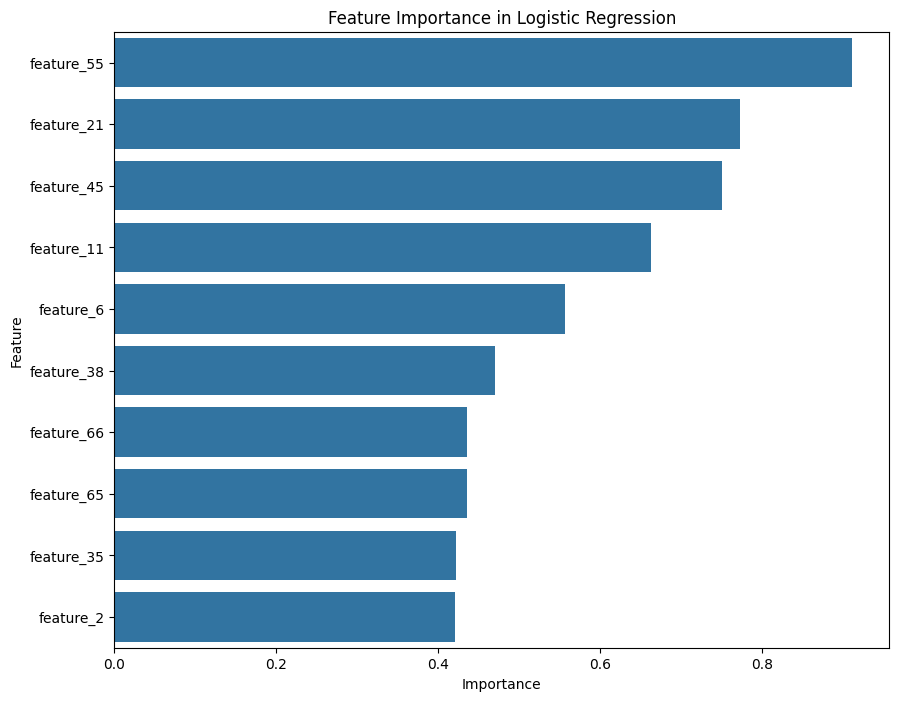

In [74]:
# Create a DataFrame for feature importance
logistic_feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': lr_coefficients
})

# Sort the features by importance
logistic_feature_importance = logistic_feature_importance.sort_values(by='Importance', ascending=False)
print(logistic_feature_importance)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=logistic_feature_importance[:10])
plt.title('Feature Importance in Logistic Regression')
plt.show()

#### DecisionTreeClassifier

In [75]:
# Decision Tree
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(random_state=42)
dt_model = dt_model.fit(x_train, y_train)
dt_model.score(x_test, y_test), dt_model.score(x_train, y_train)

(0.6666666666666666, 1.0)

         Feature  Importance
36    feature_36    0.085381
58    feature_58    0.084951
133  feature_133    0.075634
73    feature_73    0.075511
17    feature_17    0.048655
..           ...         ...
140  feature_140    0.000000
71    feature_71    0.000000
142  feature_142    0.000000
74    feature_74    0.000000
130  feature_130    0.000000

[180 rows x 2 columns]


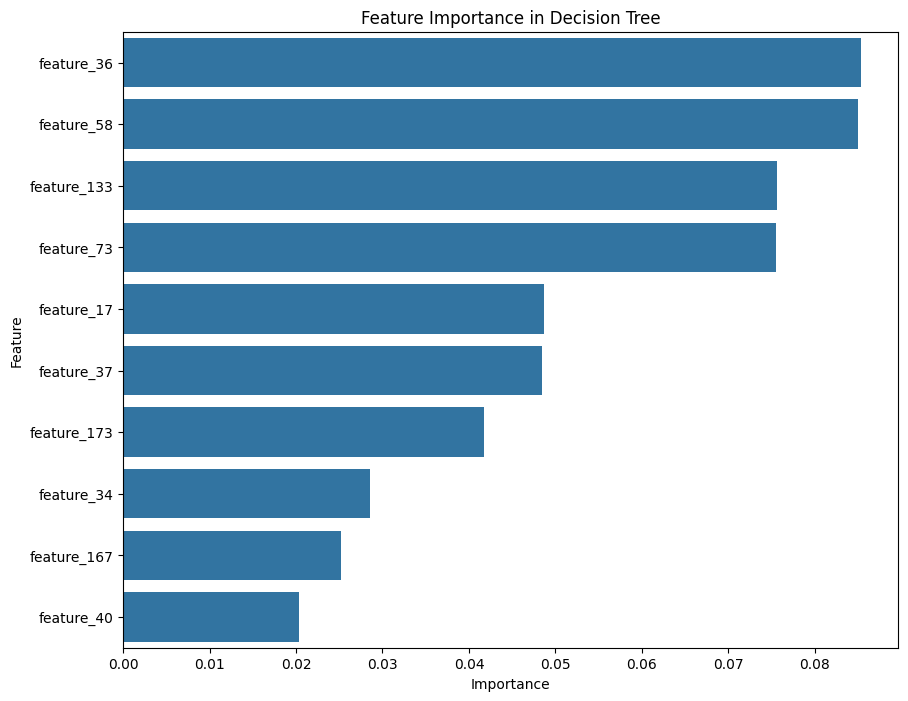

In [76]:
# Feature Importances using DecisionTreeClassifier

# Getting the feature importances
dt_feature_importances = dt_model.feature_importances_
# Creating a DataFrame for feature importance
dt_feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': dt_feature_importances
})

# Sort the features by importance
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
print(dt_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df[:10])
plt.title('Feature Importance in Decision Tree')
plt.show()

#### RandomForestClassifier

In [77]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test), rf_model.score(x_train, y_train)

(0.7773333333333333, 1.0)

         Feature  Importance
17    feature_17    0.028416
58    feature_58    0.027984
36    feature_36    0.021110
37    feature_37    0.018016
23    feature_23    0.015766
..           ...         ...
78    feature_78    0.002434
145  feature_145    0.002408
50    feature_50    0.002332
94    feature_94    0.002265
148  feature_148    0.001973

[180 rows x 2 columns]


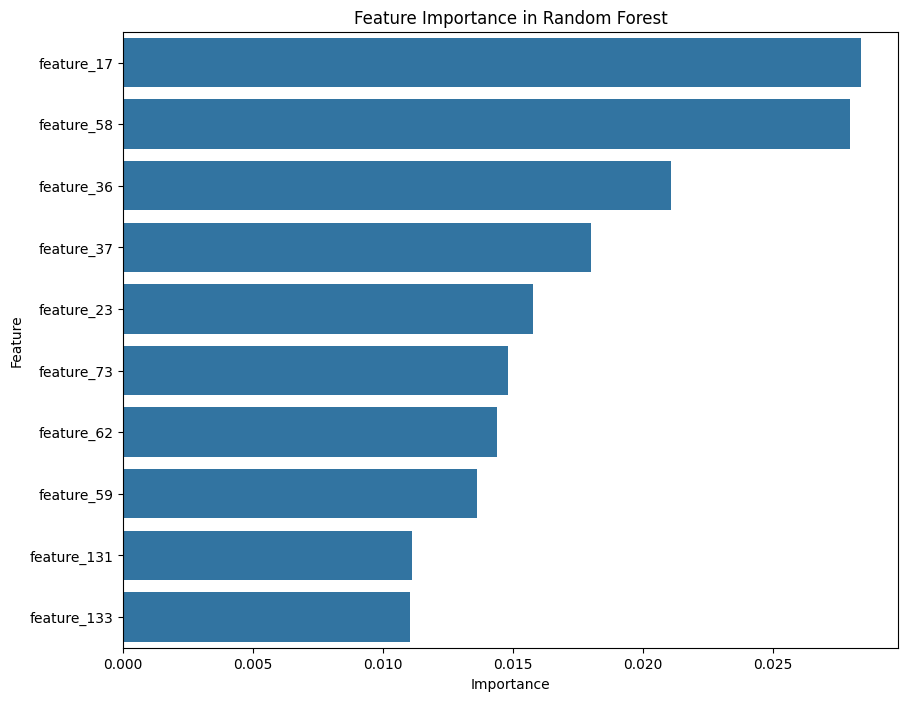

In [78]:
# Feature Importances using RandomForestClassifier
# Get the feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf_feature_importances
})

# Sort the features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
print(rf_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df[:10])
plt.title('Feature Importance in Random Forest')
plt.show()

#### LinearSVC

In [79]:
#Linear SVC
from sklearn.svm import LinearSVC

Lsvm = LinearSVC(random_state=0, tol=1e-5)
Lsvm.fit(x_train, y_train)
Lsvm.score(x_test, y_test)

0.7133333333333334

         Feature  Importance
55    feature_55    1.329967
45    feature_45    0.729502
62    feature_62    0.717806
38    feature_38    0.581160
66    feature_66    0.498528
..           ...         ...
52    feature_52   -0.591244
163  feature_163   -0.602600
46    feature_46   -0.632178
64    feature_64   -0.868411
24    feature_24   -1.106756

[180 rows x 2 columns]


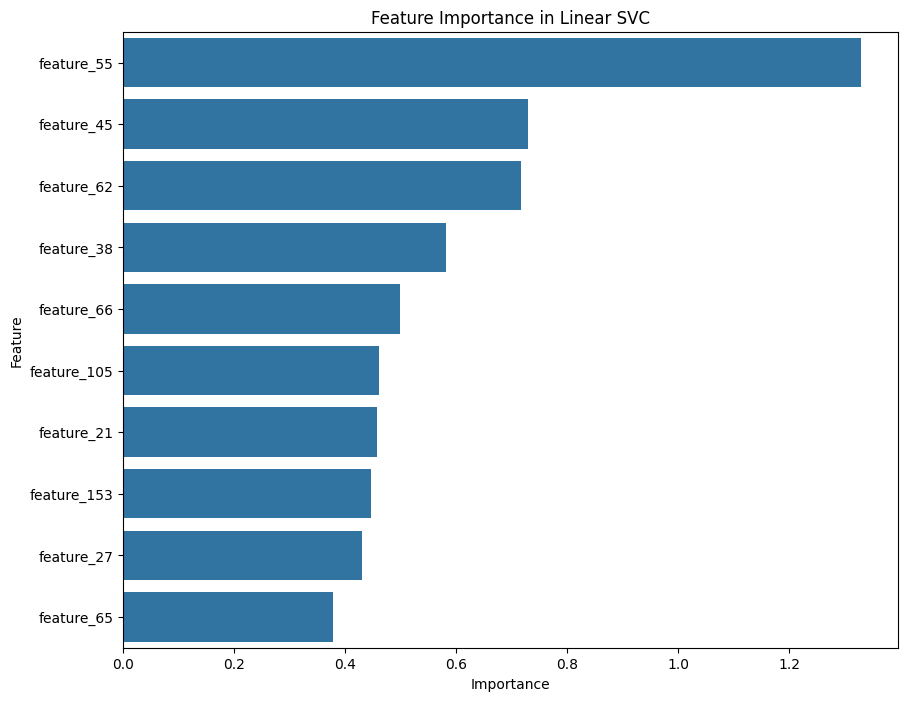

In [80]:
# Feature Importances using LinearSVC
# Get the feature importances (coefficients)
linearSVC_coefficients = Lsvm.coef_[0]

# Create a DataFrame for feature importance
linearSVC_feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': linearSVC_coefficients
})

# Sort the features by importance
linearSVC_feature_importance_df = linearSVC_feature_importance_df.sort_values(by='Importance', ascending=False)
print(linearSVC_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=linearSVC_feature_importance_df[:10])
plt.title('Feature Importance in Linear SVC')
plt.show()

#### SGDClassifier

In [81]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, tol=1e-3)

sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.7093333333333334

         Feature  Importance
6      feature_6   12.223116
35    feature_35   12.128369
11    feature_11   10.898257
36    feature_36   10.095064
33    feature_33   10.073139
..           ...         ...
165  feature_165  -22.581680
163  feature_163  -23.780589
24    feature_24  -23.897187
61    feature_61  -25.783876
166  feature_166  -25.857707

[180 rows x 2 columns]


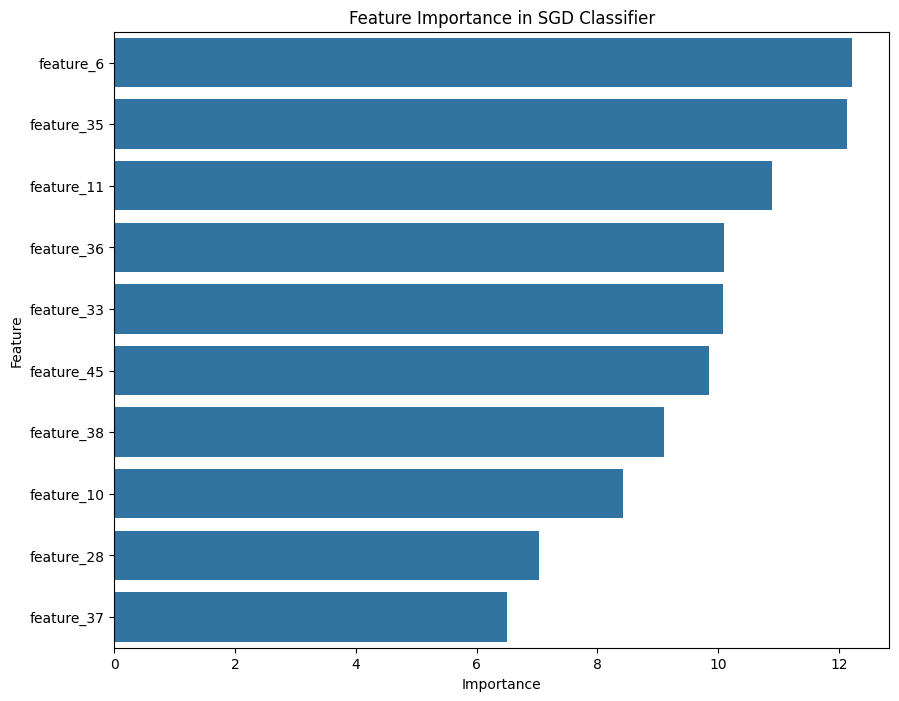

In [82]:
# Feature Importances using SGDClassifier
# Get the feature importances (coefficients)
sgd_coefficients = sgd.coef_[0]

# Create a DataFrame for feature importance
sgd_feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': sgd_coefficients
})

# Sort the features by importance
sgd_feature_importance_df = sgd_feature_importance_df.sort_values(by='Importance', ascending=False)
print(sgd_feature_importance_df)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=sgd_feature_importance_df[:10])
plt.title('Feature Importance in SGD Classifier')
plt.show()

#### XGBClassifier

In [83]:
df_final.iloc[:,2:]

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
0,0.451155,3.098941,0.189885,-2.538865,-0.718842,1.317393,-2.001161,-0.082543,-0.511450,-0.205520,...,-0.356511,-0.367111,-0.150350,-0.257902,-0.259188,-0.348390,-0.480514,-0.524654,-0.504734,-0.509453
1,0.953847,-0.050316,0.608611,-1.056351,0.276037,-1.233024,-0.169286,0.338868,-0.544472,-0.151082,...,0.666663,1.080245,1.019023,1.142321,0.948937,0.989658,0.960587,0.820110,0.631733,1.048046
2,0.930970,0.462956,0.166956,-1.643533,0.125872,-0.306346,0.581851,1.552628,-0.169618,-0.960979,...,0.168979,1.027026,1.637235,1.215821,1.731880,1.398941,1.862121,1.385505,1.458803,2.182428
3,1.338388,1.078272,0.107285,-0.836372,0.820419,-2.585501,-1.243326,0.743534,-0.622513,0.209503,...,4.042969,4.118462,3.821245,2.712311,2.399935,2.744182,2.480093,1.312493,1.302903,0.856373
4,0.983580,0.038519,0.540143,-1.494229,-0.052226,-0.445273,-0.614551,1.421899,-1.476580,-0.374059,...,1.103542,1.142122,1.920444,2.044449,2.127074,2.024574,2.253672,1.678074,1.192049,1.381830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.254861,-0.596596,-0.028333,0.399457,-0.430234,0.925704,0.669641,1.133359,1.285381,-0.291671,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783
2496,-1.033589,0.256123,-0.056678,1.069912,-0.262612,1.576793,1.003777,0.813980,1.086184,0.089402,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783
2497,0.197584,-0.476695,-0.402812,0.785853,-0.359192,0.629750,0.949221,1.538269,1.091438,0.026877,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783
2498,-1.938932,0.743611,0.407973,1.502575,0.189568,1.866070,1.897552,1.855791,1.568431,0.862853,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783


In [84]:
num_classes = df_final["labels"].nunique()
num_classes

7

In [85]:
df_final["labels"]

,labels
0,8
1,8
2,8
3,8
4,8
...,...
2495,8
2496,6
2497,3
2498,1


In [ ]:
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(df_final["labels"])

In [ ]:
# encoded_labels = np.array(encoded_labels)

In [86]:
df_final.columns[2:]

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_170', 'feature_171', 'feature_172', 'feature_173',
       'feature_174', 'feature_175', 'feature_176', 'feature_177',
       'feature_178', 'feature_179'],
      dtype='object', length=180)

In [ ]:
# # XGBoost Classifier
# # Encode labels to be zero-based
# # label_encoder = LabelEncoder()
# # encoded_labels = label_encoder.fit(df_final[labels])

# # Split the dataset into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(np.array(df_final.iloc[:,2:]), encoded_labels, test_size=0.2, random_state=42)

# # Create and train the XGBClassifier model
# # num_classes = len(np.unique(encoded_labels))

# xgb_model = xgb.XGBClassifier(
#     objective='multi:softmax',  # Multi-class classification objective
#     num_class=num_classes,       # Number of unique classes
#     colsample_bytree=0.3,
#     learning_rate=0.1,
#     max_depth=5,
#     alpha=10,
#     n_estimators=10,
#     random_state=42
# )

# # Fit the model
# xgb_model.fit(x_train, y_train)

# # Predict on the test set
# y_pred = xgb_model.predict(x_test)

# # Reverse the encoding of predictions
# y_pred_original = label_encoder.inverse_transform(y_pred)
# y_test_original = label_encoder.inverse_transform(y_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test_original, y_pred_original)
# print(f'Accuracy: {accuracy:.2f}')


#### Apply the voting classifier

In [115]:
lr = LogisticRegression(random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
rf_model_v = RandomForestClassifier(random_state=42)
Lsvm = LinearSVC(random_state=0, tol=1e-5)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
# xgb_model = xgb.XGBClassifier(
#     objective='multi:softmax',  # Multi-class classification objective
#     num_class=num_classes,       # Number of unique classes
#     colsample_bytree=0.3,
#     learning_rate=0.1,
#     max_depth=5,
#     alpha=10,
#     n_estimators=10,
#     random_state=42
# )
voting = VotingClassifier(estimators=[('lr',lr), ('dt', dt), ('rf', rf_model_v), ('sgd', sgd),('Lsvm',Lsvm)], voting='hard')
voting = voting.fit(x_train, y_train)
voting.score(x_test, y_test)

0.7493333333333333

In [119]:
y_pred = voting.predict(x_test)

In [116]:
# xgb_model = xgb.XGBClassifier(
#     objective='multi:softmax',  # Multi-class classification objective
#     num_class=num_classes,       # Number of unique classes
#     colsample_bytree=0.3,
#     learning_rate=0.1,
#     max_depth=5,
#     alpha=10,
#     n_estimators=10,
#     random_state=42
# )

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [133]:
voting.classes_

array([1, 3, 4, 5, 6, 7, 8])

In [136]:
class_labels = [label_mapper[label] for label in voting.classes_]

In [134]:
label_mapper = {
    1: "neutral",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "fearful",
    7: "disgust",
    8: "surprised"
}

In [137]:
class_labels

['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.79      0.82        95
           3       0.73      0.70      0.72       108
           4       0.70      0.81      0.75        97
           5       0.82      0.78      0.80       122
           6       0.73      0.66      0.69        97
           7       0.75      0.78      0.77       122
           8       0.68      0.72      0.70       109

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750



In [129]:
cm = confusion_matrix(y_test, y_pred)

In [139]:
ConfusionMatrixDisplay?

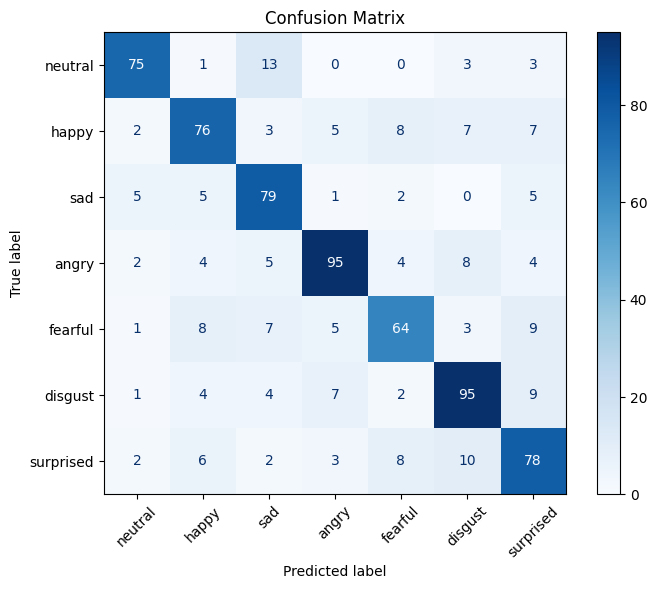

In [140]:
fig, ax = plt.subplots(figsize=(8, 6))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", ax=ax)  # Use 'ax=ax' to plot on the specified figure

# Formatting
plt.title("Confusion Matrix")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [126]:
y_train_xg = y_train.map(label_mapper)
y_test_xg = y_test.map(label_mapper)

In [127]:
# xgb_model.fit(x_train, y_train_xg)
# xgb_model.score(x_test, y_test_xg)

0.6946666666666667

In [88]:
# Feature Importances using VotingClassifier
# Combine feature importances into a DataFrame for visualization
features_list = df_final.columns[2:]

feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Decision Tree Importance': dt_feature_importances,
    'Random Forest Importance': rf_feature_importances,
    'Logistic Regression Importance': lr_coefficients,
    'Linear SVC Importance': linearSVC_coefficients,
    'SGD Importance': sgd_coefficients,
    # 'XGB Importance': xgb_feature_importances
})
feature_importance_df.head()

,Feature,Decision Tree Importance,Random Forest Importance,Logistic Regression Importance,Linear SVC Importance,SGD Importance
0,feature_0,0.004629,0.008603,-1.477956,-0.452147,-8.918354
1,feature_1,0.003900,0.004347,0.071984,-0.020696,-6.383026
2,feature_2,0.001114,0.007400,0.420787,0.099739,-0.930382
3,feature_3,0.004639,0.003830,-0.018400,-0.077417,5.221510
4,feature_4,0.005143,0.005984,0.418477,0.118142,4.299799


- min and max feature importances

In [89]:
# Calculate min and max feature importances
min_importances = {
    'Logistic Regression': lr_coefficients.min(),
    'Decision Tree': dt_feature_importances.min(),
    'Random Forest': rf_feature_importances.min(),
    'Linear SVC': linearSVC_coefficients.min(),
    'SGD': sgd_coefficients.min(),
    # 'XGB': xgb_feature_importances.min()
}

max_importances = {
    'Logistic Regression': lr_coefficients.max(),
    'Decision Tree': dt_feature_importances.max(),
    'Random Forest': rf_feature_importances.max(),
    'Linear SVC': linearSVC_coefficients.max(),
    'SGD': sgd_coefficients.max(),
    # 'XGB': xgb_feature_importances.max()
}

# Combine min and max values into a DataFrame
feature_importance_min_max_df = pd.DataFrame({
    'Classifier': min_importances.keys(),
    'Min Importance': min_importances.values(),
    'Max Importance': max_importances.values()
})
feature_importance_min_max_df

,Classifier,Min Importance,Max Importance
0,Logistic Regression,-1.477956,0.911728
1,Decision Tree,0.000000,0.085381
2,Random Forest,0.001973,0.028416
3,Linear SVC,-1.106756,1.329967
4,SGD,-25.857707,12.223116


#### Testing with a sample

In [91]:
emotion

{'neutral': 1,
 'calm': 2,
 'happy': 3,
 'sad': 4,
 'angry': 5,
 'fear': 6,
 'disgust': 7,
 'surprised': 8}

In [92]:
predicted_array = voting.predict(x_test)

In [93]:
predicted_array

array([6, 1, 1, 7, 6, 6, 5, 5, 7, 7, 7, 5, 4, 1, 6, 4, 8, 8, 7, 1, 3, 6,
       4, 6, 5, 4, 3, 1, 3, 7, 7, 5, 3, 8, 4, 1, 8, 3, 4, 3, 6, 3, 3, 3,
       4, 1, 3, 8, 5, 7, 7, 5, 6, 3, 8, 5, 1, 3, 7, 6, 1, 6, 5, 4, 8, 3,
       4, 8, 7, 7, 7, 7, 5, 1, 3, 1, 5, 7, 8, 8, 7, 7, 4, 8, 3, 3, 5, 5,
       8, 7, 3, 7, 5, 4, 6, 3, 1, 5, 1, 8, 8, 8, 5, 3, 7, 3, 7, 1, 3, 6,
       3, 7, 3, 3, 4, 4, 5, 4, 7, 7, 5, 5, 8, 6, 5, 7, 4, 7, 7, 5, 5, 1,
       4, 5, 1, 7, 3, 6, 8, 3, 7, 1, 1, 3, 1, 1, 3, 5, 6, 4, 7, 7, 7, 4,
       1, 8, 6, 4, 8, 8, 3, 5, 6, 7, 5, 3, 4, 5, 7, 8, 4, 4, 6, 3, 1, 4,
       4, 7, 3, 6, 4, 5, 7, 6, 7, 4, 4, 6, 7, 8, 8, 1, 6, 3, 3, 3, 6, 7,
       6, 1, 4, 5, 6, 1, 4, 7, 7, 1, 1, 8, 7, 5, 7, 4, 3, 1, 3, 5, 7, 7,
       4, 8, 7, 4, 8, 7, 8, 4, 1, 4, 7, 1, 4, 7, 6, 4, 5, 6, 1, 5, 4, 8,
       3, 5, 6, 4, 5, 3, 4, 1, 1, 3, 7, 3, 5, 5, 8, 7, 8, 7, 7, 7, 3, 8,
       8, 5, 3, 4, 4, 3, 8, 5, 3, 1, 5, 3, 1, 5, 7, 5, 5, 4, 3, 1, 4, 1,
       8, 3, 3, 1, 6, 4, 4, 4, 8, 3, 8, 3, 7, 7, 1,

In [94]:
path_label_test.head(2)

,paths
1447,ravdess/Actor_10/03-01-06-02-01-02-10_fear.wav
1114,Tess/OAF_neutral/OAF_chair_neutral.wav


In [95]:
x_test.head(2)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179
1447,0.335881,-0.673688,-1.618423,0.576824,-0.865033,-1.262247,-0.864721,-1.373748,-0.159116,1.153727,...,-0.632269,-0.631784,-0.602677,-0.612516,-0.611333,-0.615757,-0.629583,-0.636958,-0.641709,-0.634783
1114,-0.000736,-0.176671,0.719591,-0.128590,1.489617,0.671094,1.053060,-1.136908,0.611771,1.450982,...,-0.186427,-0.192689,-0.235339,-0.367682,-0.353273,-0.367189,-0.436823,-0.429502,-0.333263,-0.308443


In [96]:
path_label_test2 = path_label_test.copy()

In [97]:
path_label_test2.reset_index(inplace=True,drop=True)

In [98]:
path_label_test2.head(2)

,paths
0,ravdess/Actor_10/03-01-06-02-01-02-10_fear.wav
1,Tess/OAF_neutral/OAF_chair_neutral.wav


In [99]:
result_dataframe = pd.DataFrame()

In [100]:
emotion_reverse = { j:i for i,j in emotion.items() }
emotion_reverse

{1: 'neutral',
 2: 'calm',
 3: 'happy',
 4: 'sad',
 5: 'angry',
 6: 'fear',
 7: 'disgust',
 8: 'surprised'}

In [101]:
result_dataframe["emotion"] = [emotion_reverse[i] for i in predicted_array]

In [102]:
result_dataframe["paths"] = path_label_test2

In [103]:
result_dataframe.head(2)

,emotion,paths
0,fear,ravdess/Actor_10/03-01-06-02-01-02-10_fear.wav
1,neutral,Tess/OAF_neutral/OAF_chair_neutral.wav


In [ ]:
# # prediction
# pred = rf_model.predict(extract_feature(test_sample).reshape(1,-1))
# list(emotion.keys())[list(emotion.values()).index(int(pred[0]))]

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

### Kaggle Testset predictions

In [104]:
!unzip -qq /content/Kaggle_Testset.zip

unzip:  cannot find or open /content/Kaggle_Testset.zip, /content/Kaggle_Testset.zip.zip or /content/Kaggle_Testset.zip.ZIP.


In [105]:
test_set = glob.glob("/content/Kaggle_Testset/*.wav")

In [106]:
def predict_kaggle_dataset(data):

  test = np.array(extract_feature(data)).reshape(1, -1)

  scaled = scaler.transform(test)

  label = voting.predict(scaled)[0]

  emotion = emotion_reverse[label]

  return emotion

In [107]:
labels = [predict_kaggle_dataset(data) for data in test_set]

In [108]:
index = [int(data.split("/")[3].split(".")[0]) for data in test_set]

In [109]:
kaggle_test_dataframe = pd.DataFrame()

kaggle_test_dataframe["Id"] = index
kaggle_test_dataframe["Label"] = labels

In [110]:
kaggle_test_dataframe.head(3)

,Id,Label


In [ ]:
output_Dataframe = kaggle_test_dataframe.sort_values(by="Id")

In [ ]:
output_Dataframe.to_csv("predictions.csv",index=False)